---
title: "Nesting Problemi"
author: "Muhammed Emir Arıkan & Ahmet Arda Kavakcı"
format:
  revealjs:
    theme: dark
    fontsize: 26px
execute:
  echo: true
---

## Sunumun Gidişatı

- Nesting problemi nediri?
- Basit bir görselleştirme
- Hedeflerimiz
- Metodoloji
- Algoritma Adımları
- Kod

## Nesting problemi nedir?

Endüstri mühendisliği ve üretim planlamada **Nesting (Yerleşim) Problemi**, düzensiz veya dikdörtgen parçaların, belirli boyutlardaki bir hammadde levhası (stock sheet) üzerine, **en az fireyi (waste)** verecek şekilde yerleştirilmesi sürecidir.

Bizim ilgileneceğimiz verisyonu, literatürde **2D Bin Packing** veya **Cutting Stock Problem** varyasyonu olarak bilinir ve çözüm karmaşıklığı açısından **NP-Hard** sınıfında yer alır. Yani parça sayısı arttıkça, en mükemmel sonucu bulmak için gereken hesaplama süresi üstel olarak artar.

---

## Hedeflerimiz

Bu projede temel amaçlarımız şunlardır:

- **Hammadde Verimliliği:** Kullanılan levha alanını minimize etmek.
- **Maliyet Düşürme:** Fire oranını azaltarak birim maliyeti düşürmek.
- **Hesaplama Hızı:** Kabul edilebilir bir sürede, uygulanabilir bir yerleşim planı oluşturmak.

---

## Çözüm Metodolojisi: Raf Algoritması (Shelf Algorithm)

Bu çalışmada, problemi "mini bir versiyon" olarak ele aldığımız için, **Sezgisel (Heuristic)** bir yaklaşım benimsenmiştir.

Kullandığımız yöntem **"First-Fit Decreasing Height" (FFDH)** tabanlı bir Raf Algoritmasıdır.

---

### Algoritmanın Adımları

1.  **Sıralama (Sorting):** Parçalar (Items), yüksekliklerine göre büyükten küçüğe doğru sıralanır. Bu, büyük blokların öncelikli yerleşmesini sağlar.
2.  **Raf Mantığı (Shelving):** Hammadde levhası sanal "raflara" bölünür.
3.  **Yeni Satır:** Mevcut satırın genişliği dolduğunda, bir üst satıra geçilir ve işlem tekrarlanır.

---

## Basit Bir Görselleştirme

![](./assets/patterns_nesting.png)

---

Algoritma yapımızı Python'a döktükten sonra karşımıza çıkacak sonuç aşağıdaki görsele benzeyecektir:

![](./assets/plot.png)

# Kod {.center}

---

Öncelikle ihtiyacımız olan kütüphaneleri aktarıyoruz.

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

---

Ardından kodda kullanacağımız objeyi, sınıf yapısı şeklinde tanımlıyoruz.

In [18]:
import uuid
class Item:
    def __init__(self, width, height):
        self.id = uuid.uuid4()
        self.width = width
        self.height = height
        self.x = 0
        self.y = 0
        self.area = width * height

    def __str__(self):
        return f"Obje Kimliği: {self.id}\nObje genişliği: {self.width}\nObje Uzunluğu: {self.height}\nObje X koordinatı: {self.x}\nObje Y kordinatı {self.y}\nObjenin toplam alanı: {self.area}"

İhtiyacımız olan parametreler; genişlik (`width`), yükseklik (`height`), koordinatlar (`x, y`) ve kolaylık olması için toplam alan (`width * height`)

---

Rastgele bloklarımızı barındıracak olan listemizi oluşturuyoruz.

In [19]:
items = []

Rastgele bloklarımızın çok büyük olmaması ve görselleştirmesinin anlaşılabilir olması için `max_w` ve `max_h` şeklinde iki değişken tanımlıyoruz. Bunlar en ve boy sınırlarımızı belirtiyor.

In [20]:
max_w = 6
max_h = 5

Son olarak toplam kaç tane blok oluşturmak istediğimizi ve ne kadar geniş bir alan istediğimizi belirtiyoruz.

In [21]:
num_items = 15
sheet_width = 20

---

`for` döngüsü ile rastgele bloklarımızı oluşturup `items` listemize ekliyoruz.

In [22]:
for i in range(num_items):
    w = random.randint(2, max_w) 
    h = random.randint(2, max_h)
    items.append(Item(w, h))

Kullanacağımız FFDH yönteminde blokların uzunluk sıralamasına ihtiyaç duyacağımız için, elimizdeki `items` listesinin sıralı halini `sorted_items` değişkenine atıyoruz.

In [23]:
sorted_items = sorted(items, key=lambda x: x.height, reverse=True)

Sıralamayı yaparken items obje listesindeki 'blok'ların sadece `height` yani uzunluk değerini kullanıyoruz. Ve sıralamayı tersten, yani büyükten küçüğe yapıyoruz.

---

Sıralanmış objelerimizi kontrol edelim:

In [24]:
for item in sorted_items:
    print(f"{item}\n\n---\n")

Obje Kimliği: a7a8fcd4-6cbe-418a-a60c-2527beaf38ea
Obje genişliği: 4
Obje Uzunluğu: 5
Obje X koordinatı: 0
Obje Y kordinatı 0
Objenin toplam alanı: 20

---

Obje Kimliği: 5bd2c165-f613-4a83-bb8f-4dec3f62ad49
Obje genişliği: 2
Obje Uzunluğu: 5
Obje X koordinatı: 0
Obje Y kordinatı 0
Objenin toplam alanı: 10

---

Obje Kimliği: aecb85ec-12d9-4f22-8762-8723acfac336
Obje genişliği: 3
Obje Uzunluğu: 5
Obje X koordinatı: 0
Obje Y kordinatı 0
Objenin toplam alanı: 15

---

Obje Kimliği: cd378bb2-b6d2-4fb6-96e3-5a11e5c20954
Obje genişliği: 2
Obje Uzunluğu: 4
Obje X koordinatı: 0
Obje Y kordinatı 0
Objenin toplam alanı: 8

---

Obje Kimliği: ca6c7e59-2af4-471f-ad37-c42c045b1cd2
Obje genişliği: 5
Obje Uzunluğu: 4
Obje X koordinatı: 0
Obje Y kordinatı 0
Objenin toplam alanı: 20

---

Obje Kimliği: e791e016-a598-4050-a6cb-2d0f39cf80c0
Obje genişliği: 3
Obje Uzunluğu: 4
Obje X koordinatı: 0
Obje Y kordinatı 0
Objenin toplam alanı: 12

---

Obje Kimliği: 442931d6-c5e3-48eb-96b8-b8d0e6b54c81
Obje gen

---

Anlık koordinatlarımızı takip edebilmek için `current_x` ve `current_y` adında iki değişken oluşturuyoruz. İlk kordinatımız `0` olacağı için `0`'a eşitliyoruz. Aynı zamanda anlık yüksekliğimizi takip etmek için de `current_row_height` adında bir değişken oluşturuyoruz.

In [25]:
packed_items = []
current_x = 0
current_y = 0
current_row_height = 0

Yerleştirilmiş bloklarımızı takip etmek için de `packed_items` adında bir liste oluşturuyoruz. Toplam yüksekliğimizi takip edebilmek için ise `total_height` adında bir değişken oluşturuyoruz.

In [26]:
packed_items = []
total_height = 0

---

In [27]:
for item in sorted_items:
    if current_x + item.width > sheet_width:
        current_x = 0
        current_y += current_row_height
        current_row_height = 0

    item.x = current_x
    item.y = current_y
    
    current_x += item.width
    if item.height > current_row_height:
        current_row_height = item.height
        
    packed_items.append(item)
    total_height = current_y + current_row_height

Burada oluşturduğumuz ve sıraladığımız tüm rastgele blokların `x` ve `y` koordinatlarını belirliyoruz. Başlangıçta `x` ve `y` değerleri `0`'dı, yani aslında yaptığımız şey bu blokları yerleştirmek oluyor.

Aynı zamanda `total_height` değişkenini, yani toplam yüksekliğimizi her yeni sıraya geçildiğinde güncelliyoruz.

---

Paketlediğimiz, yani yerleştirdiğimiz blokların genel yapısına bir bakalım.

In [28]:
for item in packed_items:
    print(f"{item}\n\n---\n")

Obje Kimliği: a7a8fcd4-6cbe-418a-a60c-2527beaf38ea
Obje genişliği: 4
Obje Uzunluğu: 5
Obje X koordinatı: 0
Obje Y kordinatı 0
Objenin toplam alanı: 20

---

Obje Kimliği: 5bd2c165-f613-4a83-bb8f-4dec3f62ad49
Obje genişliği: 2
Obje Uzunluğu: 5
Obje X koordinatı: 4
Obje Y kordinatı 0
Objenin toplam alanı: 10

---

Obje Kimliği: aecb85ec-12d9-4f22-8762-8723acfac336
Obje genişliği: 3
Obje Uzunluğu: 5
Obje X koordinatı: 6
Obje Y kordinatı 0
Objenin toplam alanı: 15

---

Obje Kimliği: cd378bb2-b6d2-4fb6-96e3-5a11e5c20954
Obje genişliği: 2
Obje Uzunluğu: 4
Obje X koordinatı: 9
Obje Y kordinatı 0
Objenin toplam alanı: 8

---

Obje Kimliği: ca6c7e59-2af4-471f-ad37-c42c045b1cd2
Obje genişliği: 5
Obje Uzunluğu: 4
Obje X koordinatı: 11
Obje Y kordinatı 0
Objenin toplam alanı: 20

---

Obje Kimliği: e791e016-a598-4050-a6cb-2d0f39cf80c0
Obje genişliği: 3
Obje Uzunluğu: 4
Obje X koordinatı: 16
Obje Y kordinatı 0
Objenin toplam alanı: 12

---

Obje Kimliği: 442931d6-c5e3-48eb-96b8-b8d0e6b54c81
Obje g

---

Burada $\text{10 inç} \times \text{6 inç}$'lik bir boş grafik oluşturuyoruz. Diretk olarak `plt`'yi kullanmak yerine obje odaklı grafik oluşturma yöntemini tercih ediyoruz.

Ardından kutumuzu, veya düzlemimizi temsil eden dikdörtgeni oluşturuyoruz.

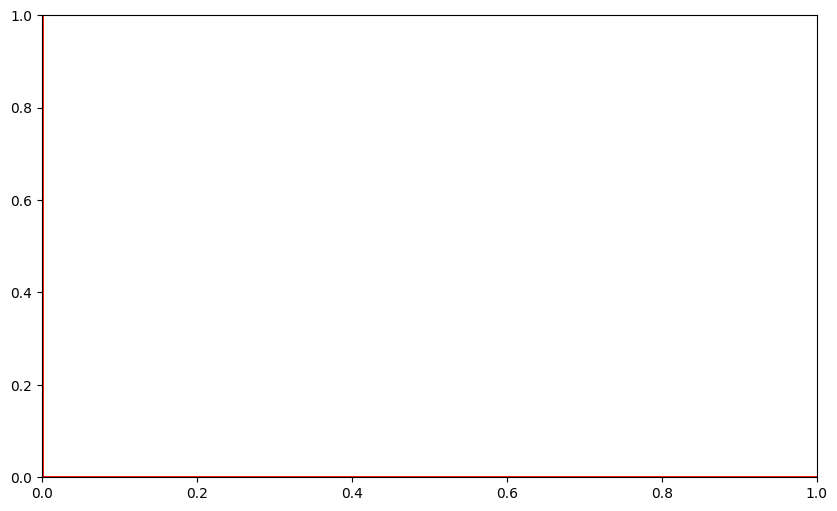

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.add_patch(patches.Rectangle((0, 0), sheet_width, total_height, 
                               linewidth=2, edgecolor='red', facecolor='none'))

---

Hemen ardından bloklarımızı daha renkli görebilmek için blok sayımız kadar renkler oluşturuyoruz.

In [30]:
colors = plt.cm.tab20([i/len(packed_items) for i in range(len(packed_items))])
print(colors)

[[0.12156863 0.46666667 0.70588235 1.        ]
 [0.68235294 0.78039216 0.90980392 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.59607843 0.8745098  0.54117647 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.77254902 0.69019608 0.83529412 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.96862745 0.71372549 0.82352941 1.        ]
 [0.49803922 0.49803922 0.49803922 1.        ]
 [0.7372549  0.74117647 0.13333333 1.        ]
 [0.85882353 0.85882353 0.55294118 1.        ]
 [0.09019608 0.74509804 0.81176471 1.        ]]


Burada gördüğümüz çıktı, `RGBA` yani `Red`, `Green`, `Blue` ve `Alpha`'yı temsil ediyor. Bildiğimizin dışında `Alpha` burada saydamlığı temsil ediyor.

In [31]:
print(f"Renk sayısı: {len(colors)}")

Renk sayısı: 15



Elimizdeki tüm blokları renklendireceğimiz için renk sayımız da blok sayımızla aynı oluyor.

---

Yüzeyimizi oluşturduğumuza göre artık paketlediğimiz blokları grafiğimize ekleyebiliriz. `x` ve `y` değerlerimiz belirli olduğu için. `rect` değişkenlerinin her biri için direkt olarak objemizde bulunan `x` ve `y` değerlerini ekleyebiliriz

In [32]:
#| output: false
for i, item in enumerate(packed_items):
    rect = patches.Rectğangle((item.x, item.y), item.width, item.height, 
                             linewidth=1, edgecolor='black', facecolor=colors[i], alpha=0.9)
    ax.add_patch(rect)
    
    short_id = str(item.id)[:4] 
    ax.text(item.x + item.width/2, item.y + item.height/2, short_id, 
            ha='center', va='center', color='white', fontsize=9, weight='bold')

AttributeError: module 'matplotlib.patches' has no attribute 'Rectğangle'

Aynı zamanda `width` ve `height` özellikleri de belirli olduğu için boyutlandırma işlemini de aynı şekilde yapabiliriz.

---

Grafiğimizin _x_ ve _y_ limitini `0`'dan daha düşük bir değere atıyoruz ki yüzeyimiz grafiğin biraz sağında ve üstünde gözüksün.

In [ ]:
ax.set_xlim(-1, sheet_width + 1)
ax.set_ylim(-1, total_height + 5) 
ax.set_aspect('equal')

Grafiğimizin başlığını belirliyoruz. Ve başlığın içeriğinde kullanılan toplam uzunluğu da yazdırıyoruz.

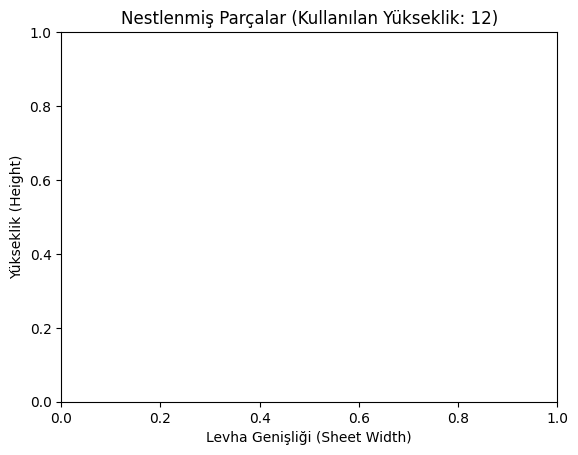

In [ ]:
#| output: false
plt.title(f"Nestlenmiş Parçalar (Kullanılan Yükseklik: {total_height})")
plt.xlabel("Levha Genişliği (Sheet Width)")
plt.ylabel("Yükseklik (Height)")
plt.show()

Ayrıca _x_ ve _y_ eksenlerinin neyi ifade ettiğini belirtiyoruz.

---

Son olarak grafiğimizi yazdırıyoruz.

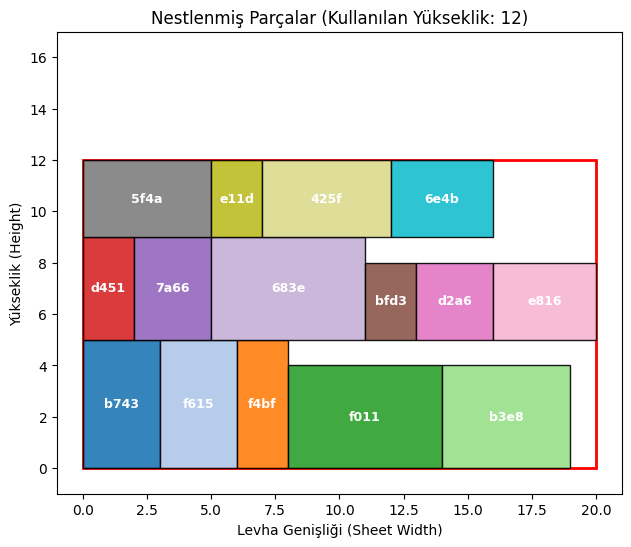

In [ ]:
#| echo: false
fig, ax = plt.subplots(figsize=(10, 6))

ax.add_patch(patches.Rectangle((0, 0), sheet_width, total_height, 
                               linewidth=2, edgecolor='red', facecolor='none', label='Hammadde'))

ax.set_xlim(-1, sheet_width + 1)
ax.set_ylim(-1, total_height + 5)

for i, item in enumerate(packed_items):
    rect = patches.Rectangle((item.x, item.y), item.width, item.height, 
                             linewidth=1, edgecolor='black', facecolor=colors[i], alpha=0.9)
    ax.add_patch(rect)
    
    short_id = str(item.id)[:4] 
    ax.text(item.x + item.width/2, item.y + item.height/2, short_id, 
            ha='center', va='center', color='white', fontsize=9, weight='bold')

ax.set_xlim(-1, sheet_width + 1)
ax.set_ylim(-1, total_height + 5) 
ax.set_aspect('equal')
plt.title(f"Nestlenmiş Parçalar (Kullanılan Yükseklik: {total_height})")
plt.xlabel("Levha Genişliği (Sheet Width)")
plt.ylabel("Yükseklik (Height)")
plt.show()

# Teşekkürler {.center}

---

# Kaynakça {.center}

- Wäscher, G., Haußner, H., & Schumann, H. (2007). *An improved typology of cutting and packing problems*. European Journal of Operational Research, 183(3), 1109-1130.